In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import GRU, Dense
from keras.optimizers import Adam

In [54]:

df = pd.read_csv("weatherHistory.csv")  


In [55]:
# Data Preprocessing
df = df[['Formatted Date', 'Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Pressure (millibars)']]



In [56]:

# Convert 'Formatted Date' to datetime and set as index
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'])
df.set_index('Formatted Date', inplace=True)

/var/folders/k9/2v1n2cw97z5_1vftpp8ft2br0000gn/T/ipykernel_62009/4038201023.py:2: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Formatted Date'] = pd.to_datetime(df['Formatted Date'])


In [57]:

# Normalize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [58]:

# Prepare data for GRU input
sequence_length = 7  # Weekly data
X = []
y = []
for i in range(len(scaled_data) - sequence_length):
    X.append(scaled_data[i:i+sequence_length, 1:])  
    y.append(scaled_data[i+sequence_length, 3])    

In [59]:

X = np.array(X)
y = np.array(y)

In [60]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [61]:

# Define GRU Model
model = Sequential()
model.add(GRU(units=50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [62]:

# Compile the model
model.compile(optimizer=Adam(), loss='mse')

In [63]:

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=2)


Epoch 1/10
2412/2412 - 4s - 2ms/step - loss: 0.2829 - val_loss: 0.2738
Epoch 2/10
2412/2412 - 3s - 1ms/step - loss: 0.2736 - val_loss: 0.2730
Epoch 3/10
2412/2412 - 3s - 1ms/step - loss: 0.2722 - val_loss: 0.2737
Epoch 4/10
2412/2412 - 3s - 1ms/step - loss: 0.2711 - val_loss: 0.2717
Epoch 5/10
2412/2412 - 3s - 1ms/step - loss: 0.2708 - val_loss: 0.2724
Epoch 6/10
2412/2412 - 3s - 1ms/step - loss: 0.2699 - val_loss: 0.2719
Epoch 7/10
2412/2412 - 3s - 1ms/step - loss: 0.2693 - val_loss: 0.2707
Epoch 8/10
2412/2412 - 3s - 1ms/step - loss: 0.2687 - val_loss: 0.2715
Epoch 9/10
2412/2412 - 3s - 1ms/step - loss: 0.2678 - val_loss: 0.2698
Epoch 10/10
2412/2412 - 3s - 1ms/step - loss: 0.2673 - val_loss: 0.2704


In [64]:

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test Loss (MSE):", loss)

603/603 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - loss: 0.2787
Test Loss (MSE): 0.27043312788009644


In [65]:

# RMSE
rmse = np.sqrt(loss)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.520031852755287


In [66]:

# Make predictions
predictions = model.predict(X_test)

603/603 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step


In [67]:

mean_wind_speed = df['Wind Speed (km/h)'].mean()
std_wind_speed = df['Wind Speed (km/h)'].std()


predictions_inv = predictions * std_wind_speed + mean_wind_speed
y_test_inv = y_test * std_wind_speed + mean_wind_speed


In [68]:

print("Actual Values:")
print(y_test_inv)
print("Predicted Values:")
print(predictions_inv)

Actual Values:
[ 3.88006407  4.79776883 26.16257958 ... 14.66711999 27.08028434
  3.21996065]
Predicted Values:
[[ 7.8588963]
 [ 6.454099 ]
 [16.676992 ]
 ...
 [13.3512745]
 [34.58056  ]
 [ 3.9238858]]


In [74]:
df.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Pressure (millibars)
Formatted Date,,,,,,
2006-04-01 00:00:00+02:00,9.472222,7.388889,0.89,14.1197,251,1015.13
2006-04-01 01:00:00+02:00,9.355556,7.227778,0.86,14.2646,259,1015.63
2006-04-01 02:00:00+02:00,9.377778,9.377778,0.89,3.9284,204,1015.94
2006-04-01 03:00:00+02:00,8.288889,5.944444,0.83,14.1036,269,1016.41
2006-04-01 04:00:00+02:00,8.755556,6.977778,0.83,11.0446,259,1016.51


In [75]:
df.resample("W")

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

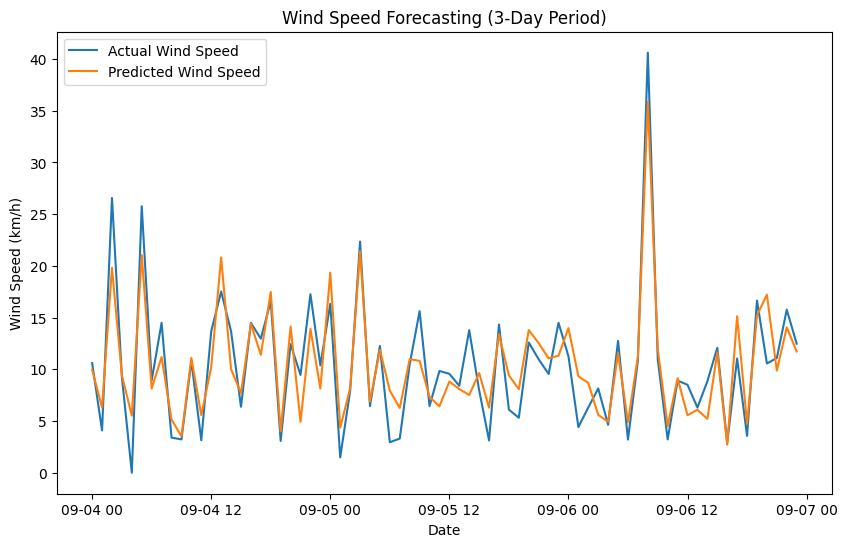

In [69]:
num_data_points = 3 * 24  # Assuming hourly data, so 3 days * 24 hours/day

plt.figure(figsize=(10, 6))
plt.plot(df.index[-num_data_points*2:-num_data_points], y_test_inv[-num_data_points*2:-num_data_points], label='Actual Wind Speed')
plt.plot(df.index[-num_data_points*2:-num_data_points], predictions_inv[-num_data_points*2:-num_data_points], label='Predicted Wind Speed')
plt.title('Wind Speed Forecasting (3-Day Period)')
plt.xlabel('Date')
plt.ylabel('Wind Speed (km/h)')
plt.legend()
plt.show()